# Nutrient Balance - Phosphorus and Nitrogen
Phosphorus and nitrogen balance (surfeit +, deficit -) time series by country/territory.  

Note that this is a parameterized widget; the specification passed to the API will not be renderable without the geostore identifier being inserted.  

_Author: Peter Kerins_  
_Created: 23 Aug 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Ocean Watch country page - parameterized chart
- Line chart
- Multiline

## Data
Underlying dataset: [foo.063.rw0 Nutrient Balance](https://resourcewatch.carto.com/u/wri-rw/dataset/foo_063_rw0_nutrient_balance_edit)  
Widget data: [ow_widget_territory](https://resourcewatch.carto.com/u/wri-rw/dataset/ow_widget_territory) (master table for all territory-based widgets on Ocean Watch)  

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Widget

## Demo Query
`gid_0 = <territory>` used as stand-in for parameterization
```sql
SELECT gid_0, name_0, CONCAT(nutrients, ' ', indicator) AS variable, time as date, value 
FROM foo_063_rw0_nutrient_balance_edit 
INNER JOIN gadm36_0 gadm on gadm.gid_0 = iso  
WHERE indicator = 'Balance per hectare' and gid_0 = 'MEX'
```

## Parameterized Query
```sql
SELECT gid_0, name_0, CONCAT(nutrients, ' ', indicator) AS variable, time as date, value 
FROM foo_063_rw0_nutrient_balance_edit 
INNER JOIN gadm36_0 gadm on gadm.gid_0 = iso  
WHERE indicator = 'Balance per hectare' and {{geostore_env}}= '{{geostore_id}}'
```

## Specification
Vega code presumes RW-style `config` element present

In [10]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Nutrient balance of phosphorus and nitrogen time series, by country",
  "padding": 0,
  "autosize": {
    "type": "fit",
    "contains": "padding"
  },
  "signals": [],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, name_0, CONCAT(nutrients, ' ', indicator) AS variable, time as date, value FROM foo_063_rw0_nutrient_balance_edit INNER JOIN gadm36_0 gadm on gadm.gid_0 = iso  WHERE indicator = 'Balance per hectare' and {{geostore_env}}= '{{geostore_id}}'",
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {
          "date": "utc:'%Y'"
        }
      },
      "transform": [
        {
          "type": "formula",
          "expr": "slice(datum.variable,0,indexof(datum.variable,' '))",
          "as": "nutrient"
        },
        {
          "type": "formula",
          "expr": "utcyear(datum.date)",
          "as": "time"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {
        "data": "table",
        "fields": [
          "date"
        ]
      },
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {
        "data": "table",
        "field": "value"
      },
      "range": "height",
      "padding": 0
    },
    {
      "name": "colorscale",
      "type": "ordinal",
      "domain": [
        "Nitrogen",
        "Phosphorus"
      ],
      "range": [
        "#f3b229",
        "#5DBAB2"
      ]
    },
    {
      "name": "shapescale",
      "type": "ordinal",
      "domain": [
        "Nitrogen",
        "Phosphorus"
      ],
      "range": [
        "circle",
        "diamond"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true,
      "labelBaseline": "middle",
      "domain": true,
      "ticks": true,
      "tickSize": 5,
      "grid": false,
      "format": "%Y"
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Nutrient balance (kg/ha)",
      "labelBaseline": "middle",
      "labelAlign": "right",
      "labelPadding": 5,
      "domain": false,
      "grid": true,
      "gridOpacity": 0.2,
      "offset": 3,
      "ticks": false,
      "titleFont": "Lato",
      "encode": {
        "ticks": {
          "update": {
            "stroke": {
              "value": "steelblue"
            }
          }
        },
        "labels": {
          "interactive": true,
          "update": {
            "fill": {
              "value": "grey"
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        }
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series",
          "data": "table",
          "groupby": "nutrient"
        }
      },
      "marks": [
        {
          "type": "line",
          "from": {
            "data": "series"
          },
          "interactive": false,
          "encode": {
            "enter": {
              "x": {
                "scale": "xscale",
                "field": "date"
              },
              "y": {
                "scale": "yscale",
                "field": "value"
              },
              "stroke": {
                "scale": "colorscale",
                "field": "nutrient"
              },
              "strokeWidth": {
                "value": 1.5
              },
              "interpolate": {
                "value": "linear"
              }
            }
          }
        },
        {
          "type": "symbol",
          "from": {
            "data": "series"
          },
          "encode": {
            "enter": {
              "x": {
                "scale": "xscale",
                "field": "date"
              },
              "y": {
                "scale": "yscale",
                "field": "value"
              },
              "stroke": {
                "scale": "colorscale",
                "field": "nutrient"
              },
              "shape": {
                "scale": "shapescale",
                "field": "nutrient"
              },
              "strokeWidth": {
                "value": 1.5
              },
              "size": {
                "signal": "width/8"
              },
              "interpolate": {
                "value": "monotone"
              },
              "fillOpacity": {
                "value": 1
              },
              "strokeOpacity": {
                "value": 1
              }
            },
            "update": {
              "fill": {
                "scale": "colorscale",
                "field": "nutrient"
              },
              "fillOpacity": {"value": 0.2}
            },
            "hover": {
              "fill": {
                "scale": "colorscale",
                "field": "nutrient"
              },
              "fillOpacity": {"value": 1}
            }
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "type": "symbol",
      "direction": "horizontal",
      "orient": "bottom",
      "stroke": "colorscale",
      "fill": "colorscale",
      "fillOpacity": 0.2,
      "shape": "shapescale",
      "labelFont": "Lato"
    }
  ],
    "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
         {
            "column": "time",
            "property": "Year",
            "type": "text",
            "format": ""
          },
          {
            "column": "nutrient",
            "property": "Nutrient",
            "type": "text",
            "format": ""
          },
           {
            "column": "value",
            "property": "Nutrient balance (kg/ha)",
            "type": "number",
            "format": ""
          }
        ]
      }
    }
  ]
}
""")

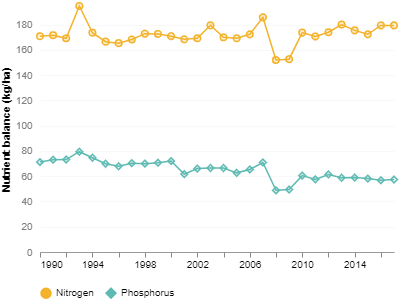

In [11]:
vega_view=dict(spec)

## DEFINE SIZE
vega_view['height'] = widget_height
vega_view['width'] = widget_width

## PARAMETERIZE WIDGET
vega_view['data'][0]['url']= vega_view['data'][0]['url'].replace('{{geostore_env}}','geostore_prod')
vega_view['data'][0]['url'] = vega_view['data'][0]['url'].replace('{{geostore_id}}','ca5bfde08587530e76c17fe48362a01d')

## ADJUST X AXIS
vega_view['axes'][0]['labelBaseline']= "top"

## FONT
vega_view['axes'][1]['titleFont'] = 'Arial'
vega_view['legends'][0]['labelFont'] = 'Arial'

Vega(vega_view)


# RW API

Parameterized widgets created via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer).  

[foo.063.rw0 Nutrient Balance]() ([Admin](https://resourcewatch.org/admin/data/datasets/adba3cb5-7f18-491f-b31a-1b8b8c03fa67/edit))  
`adba3cb5-7f18-491f-b31a-1b8b8c03fa67`  
[Dataset](https://api.resourcewatch.org/v1/dataset/adba3cb5-7f18-491f-b31a-1b8b8c03fa67/), [Widgets](https://api.resourcewatch.org/v1/dataset/adba3cb5-7f18-491f-b31a-1b8b8c03fa67/widget)

In [5]:
dataset_id = 'adba3cb5-7f18-491f-b31a-1b8b8c03fa67'
name = 'Nutrient Balance'
description = 'Time series of nutrient balance for phosphorus and nitrogen, by country'

- [Country](https://api.resourcewatch.org/v1/widget/4e8f077f-bed7-44f7-8d52-d793b485f301?env=production) `4e8f077f-bed7-44f7-8d52-d793b485f301`  